# 🐾 Análisis de Datos del Refugio de Animales de Austin

Este notebook tiene como objetivo explorar y analizar un conjunto de datos reales del **Austin Animal Center**, el refugio de animales más grande de los Estados Unidos con política *no-kill*. Este centro recibe más de 18.000 animales por año y participa en iniciativas para la protección y el cuidado de animales abandonados, en riesgo o entregados.

Los datos proporcionados por la **Iniciativa de Datos Abiertos de la Ciudad de Austin** incluyen información sobre los resultados (adopciones, traslados, liberaciones, pérdidas, etc.) de animales desde octubre de 2013 hasta la actualidad.

En este análisis trabajaremos con la biblioteca **pandas** para limpiar, transformar y visualizar la información con fines exploratorios.

📁 Dataset: `aac_shelter_cat_outcome_eng.csv`


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("aac_shelter_cat_outcome_eng.csv")
df.head(5)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black


## 🔍 Exploración inicial del dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29421 entries, 0 to 29420
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age_upon_outcome      29421 non-null  object 
 1   animal_id             29421 non-null  object 
 2   animal_type           29421 non-null  object 
 3   breed                 29421 non-null  object 
 4   color                 25795 non-null  object 
 5   date_of_birth         29421 non-null  object 
 6   datetime              29421 non-null  object 
 7   monthyear             29421 non-null  object 
 8   name                  16647 non-null  object 
 9   outcome_subtype       18641 non-null  object 
 10  outcome_type          29418 non-null  object 
 11  sex_upon_outcome      29421 non-null  object 
 12  count                 29421 non-null  int64  
 13  sex                   29421 non-null  object 
 14  Spay/Neuter           29421 non-null  object 
 15  Periods            

In [3]:
df.describe(include='all')

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
count,29421,29421,29421,29421,25795,29421,29421,29421,16647,18641,...,29421,29421.000000,29421,52,29421,29421,19155,29421,10354,29421
unique,45,28209,1,65,154,4080,21927,21927,7409,17,...,7,NaN,41,14,2,2,9,40,19,44
top,2 months,A697910,Cat,domestic shorthair,brown,2015-04-28 00:00:00,2015-08-11 00:00:00,2015-08-11T00:00:00,Bella,Partner,...,Saturday,NaN,domestic shorthair,domestic shorthair,False,True,tabby,black,white,black
freq,5935,5,29421,23720,4462,68,25,25,56,9486,...,5151,NaN,23728,21,27678,27720,13613,7020,8617,7020
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.005778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.863269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ❓ Revisión de valores faltantes

In [10]:
df.isna().sum().sort_values(ascending=False)

breed2                  29369
color2                  19067
Nombre                  12774
SubtipoResultado        10780
coat_pattern            10266
Color                    3626
TipoResultado               3
ID                          0
Edad                        0
Raza                        0
TipoAnimal                  0
monthyear                   0
FechaNacimiento             0
sex                         0
Spay/Neuter                 0
Periods                     0
Period Range                0
outcome_age_(days)          0
datetime                    0
Sexo                        0
count                       0
sex_age_outcome             0
Cat/Kitten (outcome)        0
outcome_age_(years)         0
age_group                   0
outcome_month               0
dob_year                    0
dob_month                   0
dob_monthyear               0
outcome_hour                0
outcome_weekday             0
outcome_year                0
breed1                      0
domestic_b

## 🧼 Limpieza básica de datos

In [11]:
# Eliminar columnas poco informativas si las hubiera
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Renombrar columnas para mayor claridad
df = df.rename(columns={
    "animal_id": "ID",
    "name": "Nombre",
    "date_of_birth": "FechaNacimiento",
    "outcome_type": "TipoResultado",
    "outcome_subtype": "SubtipoResultado",
    "animal_type": "TipoAnimal",
    "sex_upon_outcome": "Sexo",
    "age_upon_outcome": "Edad",
    "breed": "Raza",
    "color": "Color"
})

df.head()

,Edad,ID,TipoAnimal,Raza,Color,FechaNacimiento,datetime,monthyear,Nombre,SubtipoResultado,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black


## 📊 Distribución de resultados de los animales

C:\Users\Admin\AppData\Local\Temp\ipykernel_7888\3628745631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TipoResultado', order=df['TipoResultado'].value_counts().index, palette='viridis')


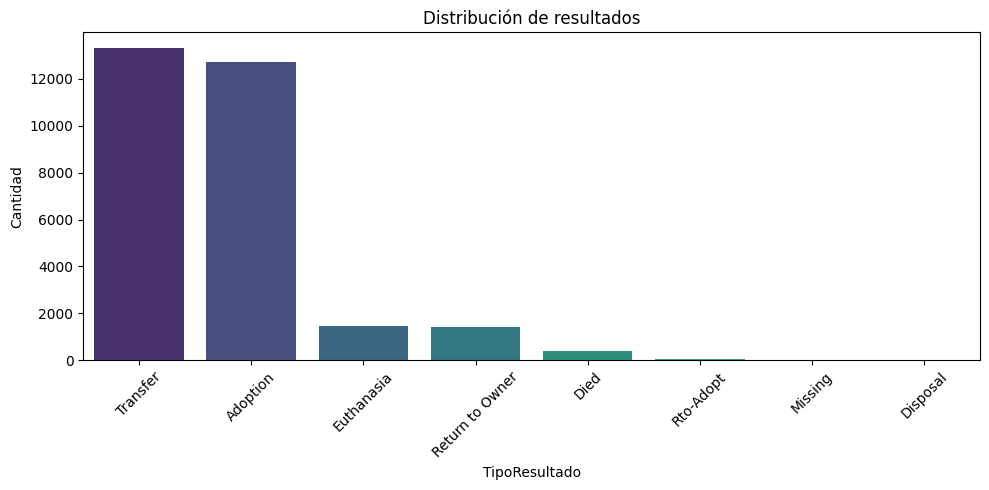

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='TipoResultado', order=df['TipoResultado'].value_counts().index, palette='viridis')
plt.title("Distribución de resultados")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🐱🐶 ¿Qué tipo de animales se registran con más frecuencia?

C:\Users\Admin\AppData\Local\Temp\ipykernel_7888\786027994.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TipoAnimal', palette='Set2')


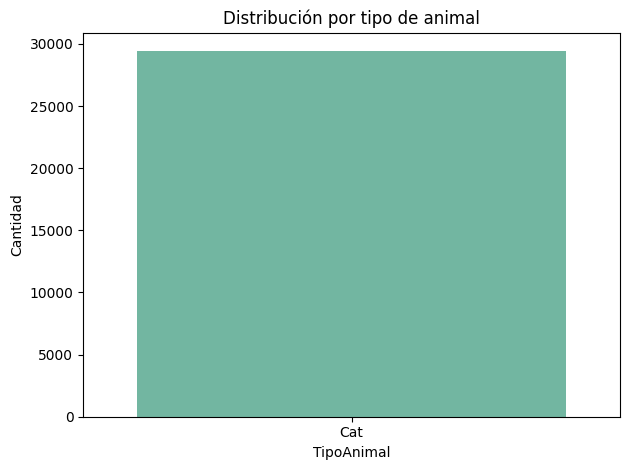

In [13]:
sns.countplot(data=df, x='TipoAnimal', palette='Set2')
plt.title("Distribución por tipo de animal")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

## ⚥ Relación entre el sexo y el resultado del animal

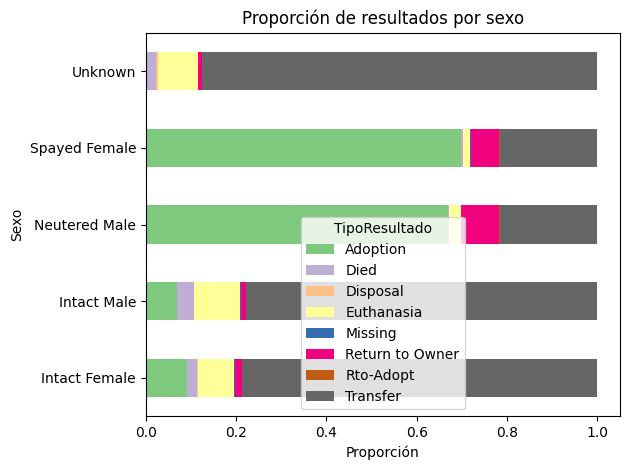

In [14]:
pd.crosstab(df['Sexo'], df['TipoResultado'], normalize='index').plot(kind='barh', stacked=True, colormap='Accent')
plt.title("Proporción de resultados por sexo")
plt.xlabel("Proporción")
plt.tight_layout()
plt.show()

## ⌛ ¿Qué edades tienen los animales al momento del resultado?

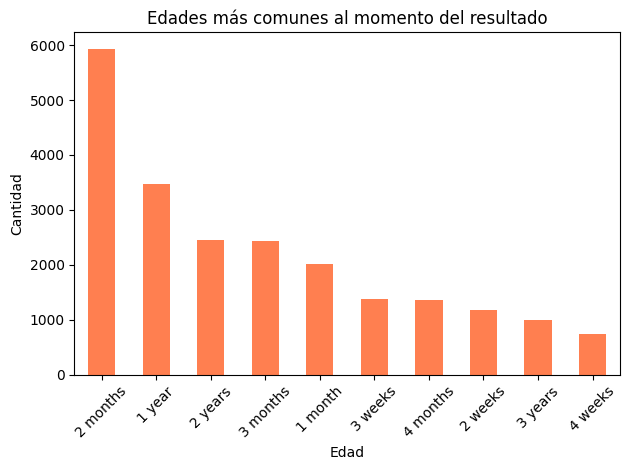

In [15]:
df['Edad'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title("Edades más comunes al momento del resultado")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🧪 Actividades prácticas y desafíos

A continuación se presentan algunos ejercicios para que pongas en práctica lo aprendido y explores más a fondo el dataset:

1. **Filtrar por especie:** Mostrá sólo los registros correspondientes a gatos (`Cat`). ¿Cuántos hay en total?

2. **Top razas:** ¿Cuáles son las 5 razas más comunes en el dataset? Representalo en un gráfico de barras.

3. **Animales con nombre:** ¿Qué proporción de animales tiene nombre? Representalo con un gráfico de torta.

4. **Resultados por raza dominante:** Analizá si hay razas que tienen mayores tasas de adopción. Filtrá las 10 razas más frecuentes y compará los resultados.

5. **Edad más común:** ¿Cuál es la edad al momento del resultado más frecuente para los animales adoptados?

6. **Nombres más comunes:** ¿Cuáles son los 10 nombres de animales más comunes en el dataset?

7. **Cruza o no cruza:** Agregá una nueva columna que indique si el animal es de raza pura o mestizo, en base a la columna de raza (`Raza`).

8. **Tendencia de adopciones:** Convertí la columna de fecha de nacimiento a datetime y tratá de analizar si hay alguna relación entre el año de nacimiento y la probabilidad de adopción.

9. **Relación entre edad y resultado:** Explorá si existe una diferencia en el tipo de resultado según la edad del animal.

10. **Exportar datos filtrados:** Filtrá los animales que fueron adoptados y guardalos en un nuevo archivo CSV llamado `adoptados.csv`.

---

> 💡 ¡Podés utilizar todas las herramientas de pandas que practicamos: filtros, agrupaciones, gráficos, funciones lambda, creación de columnas nuevas y más!


In [ ]:
# 1. **Filtrar por especie:** Mostrá sólo los registros correspondientes a gatos (`Cat`). ¿Cuántos hay en total?
df_cats = df.query("TipoAnimal == 'Cat'")
print(df_cats.head(3))

# Total de registros:
total_registros = len(df_cats)
print("Total de registros tipo 'Cat':", total_registros)

total_registros_unicos=df_cats['ID'].nunique()
print("Total de registros tipo 'Cat'unicos:", total_registros_unicos)


       Edad       ID TipoAnimal                Raza        Color  \
0   2 weeks  A684346        Cat  domestic shorthair       orange   
1   1 month  A685067        Cat  domestic shorthair  blue /white   
2  3 months  A678580        Cat  domestic shorthair  white/black   

       FechaNacimiento             datetime            monthyear  Nombre  \
0  2014-07-07 00:00:00  2014-07-22 16:04:00  2014-07-22T16:04:00     NaN   
1  2014-06-16 00:00:00  2014-08-14 18:45:00  2014-08-14T18:45:00    Lucy   
2  2014-03-26 00:00:00  2014-06-29 17:45:00  2014-06-29T17:45:00  *Frida   

  SubtipoResultado  ... outcome_weekday outcome_hour              breed1  \
0          Partner  ...         Tuesday           16  domestic shorthair   
1              NaN  ...        Thursday           18  domestic shorthair   
2          Offsite  ...          Sunday           17  domestic shorthair   

  breed2 cfa_breed  domestic_breed  coat_pattern  color1  color2    coat  
0    NaN     False            True        

Raza
domestic shorthair     23720
domestic mediumhair     2454
domestic longhair       1273
siamese                 1058
american shorthair       211
Name: count, dtype: int64


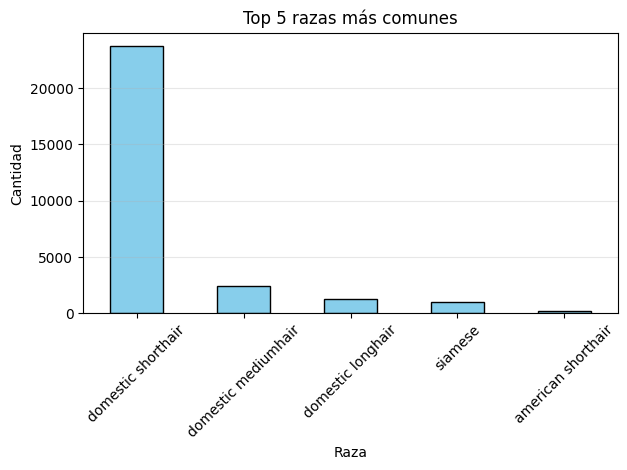

In [ ]:
# 2. **Top razas:** ¿Cuáles son las 5 razas más comunes en el dataset? Representalo en un gráfico de barras.
df.head(2)
df_top5razas = df["Raza"].value_counts().head(5)
print(df_top5razas)

df_top5razas.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 5 razas más comunes")
plt.xlabel("Raza")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

